In [27]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Caminhos dos arquivos parquet
# file1 = "historical_orders.parquet"
# file2 = "august_total_sales.parquet"
# file3 = "august_with_missing_order_days.parquet"

# # Lendo os arquivos
# historical_orders = pd.read_parquet(file1, engine="pyarrow")
# august_total_sales = pd.read_parquet(file2, engine="pyarrow")
# august_missing_days = pd.read_parquet(file3, engine="pyarrow")

# # Convertendo datas
# historical_orders['order_date'] = pd.to_datetime(historical_orders['order_date'])
# august_missing_days['order_date'] = pd.to_datetime(august_missing_days['order_date'])
# # Visualizando os dataframes
# print("historical_orders:")
# display(historical_orders.head())

# print("august_total_sales:")
# display(august_total_sales.head())

# print("august_with_missing_order_days:")
# display(august_missing_days.head())

# print("Shape de historical_orders:", historical_orders.shape)
# print("Shape de august_total_sales:", august_total_sales.shape)
# print("Shape de august_missing_days:", august_missing_days.shape)
# # Mostrando o período coberto pelo dataframe historical_orders
# min_date = historical_orders['order_date'].min()
# max_date = historical_orders['order_date'].max()
# print(f"Período coberto do historical orders: {min_date} até {max_date}")
# # Mostrando o período coberto pelo dataframe august_missing_days
# min_date = august_missing_days['order_date'].min()
# max_date = august_missing_days['order_date'].max()
# print(f"Período coberto do august missing days: {min_date} até {max_date}")
# # Quantidade de pedidos por dia
# orders_by_day = historical_orders.groupby('order_date').size()

# plt.figure(figsize=(12, 4))
# orders_by_day.plot(kind='line')
# plt.title("Pedidos por dia (histórico)")
# plt.xlabel("Data")
# plt.ylabel("Número de pedidos")
# plt.grid(True)
# plt.show()
# #Quantidade de pedidos por dia: o numero de pedidos varia bastante ao longo do tempo, 
# # com picos em alguns dias e dias sem pedidos alguns dias. 
# # De maneira geral, a media de pedidos por dia em 2022 vem sendo maior que em 2021.
# # Filtrando pedidos por ano
# orders_2021 = historical_orders[historical_orders['order_date'].dt.year == 2021]
# orders_2022 = historical_orders[historical_orders['order_date'].dt.year == 2022]

# # Agrupando por dia
# orders_by_day_2021 = orders_2021.groupby('order_date').size()
# orders_by_day_2022 = orders_2022.groupby('order_date').size()

# # Calculando estatísticas
# stats = {
#     'Ano': ['2021', '2022'],
#     'Média': [orders_by_day_2021.mean(), orders_by_day_2022.mean()],
#     'Mediana': [orders_by_day_2021.median(), orders_by_day_2022.median()],
#     'Variação (std)': [orders_by_day_2021.std(), orders_by_day_2022.std()]
# }

# stats_df = pd.DataFrame(stats)
# display(stats_df)

# #Analisando a quantidade de pedidos por dia em 2021 e 2022, podemos observar que a média de pedidos por dia em 2022 é maior que em 2021,  \
# #indicando um aumento na atividade de pedidos. A mediana também mostra um aumento, sugerindo que a maioria dos dias em 2022 teve mais pedidos \
# #do que em 2021. A variação (desvio padrão) é maior em 2022, indicando uma maior flutuação no número de pedidos diários.
# # Dias únicos com pedidos por usuário
# days_per_user = historical_orders.groupby('account_id')['order_date'].nunique()

# plt.figure(figsize=(8, 5))
# sns.histplot(days_per_user, bins=50, kde=True)
# plt.title("Distribuição de dias com pedidos por usuário (histórico)")
# plt.xlabel("Dias com pedidos")
# plt.ylabel("Quantidade de usuários")
# plt.show()

# # A analise mostra que a maioria dos usuários faz pedidos em poucos dias, 
# # com uma quantidade significativa de usuários fazendo pedidos em apenas um dia. 
# # Há também alguns usuários que fazem pedidos em muitos dias, indicando um padrão de compra mais frequente.

# plt.figure(figsize=(8, 4))
# sns.histplot(historical_orders['transaction_amount'], bins=500, kde=True)
# plt.title("Distribuição do valor de transação (histórico)")
# plt.xlabel("Valor do pedido")
# plt.ylabel("Frequência")
# plt.xlim(0, 20000)
# plt.show()
# # A distribuiçao mostra que a maioria dos pedidos tem valores baixos na faixa de 0 a 1000, sendo que uma pequena parte dos pedidos tem valores muito altos na faixa de 10000 a 20000. \
# # Isso pode indicar que a maioria dos pedidos são de itens de baixo custo, enquanto uma minoria de pedidos é de itens de alto custo.
#  # Número de dias de pedidos em agosto (com base nos dados disponíveis)
# august_missing_days['order_date'] = pd.to_datetime(august_missing_days['order_date'])
# days_in_august = august_missing_days.groupby('account_id')['order_date'].nunique()

# plt.figure(figsize=(8, 5))
# sns.histplot(days_in_august, bins=30)
# plt.title("Dias com pedidos em agosto (dados incompletos)")
# plt.xlabel("Dias registrados")
# plt.ylabel("Número de usuários")
# plt.show()
# #Comparando com o hsitograma do historico de pedidos, podemos ver que a maioria dos usuários fez pedidos em poucos dias, \sendo similar ao que foi observado no histograma do histórico de pedidos.
# # Isso sugere que a maioria dos usuários faz pedidos esporádicos, com poucos dias de atividade intensa.

## Exploratory Data Analysis (EDA) for BEES Data Science Challenge

This notebook performs an Exploratory Data Analysis (EDA) on the provided datasets for the BEES Data Science Challenge. The goal is to understand the structure, content, and characteristics of the data, which will inform the feature engineering and model building steps for predicting the number of order days.

### 1. Setup and Data Loading

First, we import the necessary libraries and load the three provided Parquet files into pandas DataFrames.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set_style("whitegrid")

# File paths
file_historical_orders = "historical_orders.parquet"
file_august_total_sales = "august_total_sales.parquet"
file_august_missing_days = "august_with_missing_order_days.parquet"

# Load the datasets
try:
    historical_orders = pd.read_parquet(file_historical_orders, engine="pyarrow")
    august_total_sales = pd.read_parquet(file_august_total_sales, engine="pyarrow")
    august_missing_days = pd.read_parquet(file_august_missing_days, engine="pyarrow")
    print("All datasets loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")

# Convert 'order_date' columns to datetime objects for easier manipulation
historical_orders['order_date'] = pd.to_datetime(historical_orders['order_date'])
august_missing_days['order_date'] = pd.to_datetime(august_missing_days['order_date'])
print("\n'order_date' columns converted to datetime.")


All datasets loaded successfully.

'order_date' columns converted to datetime.


### 2. Data Overview and Initial Inspection

 We'll start by inspecting the first few rows, checking the data types, and looking at the dimensions (shape) of each DataFrame. This gives us a quick understanding of the data structure.

In [32]:
print("--- historical_orders ---")
print("Head:")
display(historical_orders.head())
print("\nInfo:")
historical_orders.info()
print("\nMissing values:")
print(historical_orders.isnull().sum())
print(f"\nShape: {historical_orders.shape}")

print("\n--- august_total_sales ---")
print("Head:")
display(august_total_sales.head())
print("\nInfo:")
august_total_sales.info()
print("\nMissing values:")
print(august_total_sales.isnull().sum())
print(f"\nShape: {august_total_sales.shape}")

print("\n--- august_with_missing_order_days ---")
print("Head:")
display(august_missing_days.head())
print("\nInfo:")
august_missing_days.info()
print("\nMissing values:")
print(august_missing_days.isnull().sum())
print(f"\nShape: {august_missing_days.shape}")


--- historical_orders ---
Head:


,account_id,order_date,transaction_amount
0,BR_09607801000194,2021-08-28,11011.2
1,BR_09607801000194,2021-08-28,13764.0
2,BR_09607801000194,2021-08-28,11011.2
3,BR_09607801000194,2021-08-28,11011.2
4,BR_09607801000194,2021-08-28,13764.0



Info:
<class 'pandas.core.frame.DataFrame'>
Index: 8596877 entries, 0 to 9397113
Data columns (total 3 columns):
 #   Column              Dtype         
---  ------              -----         
 0   account_id          object        
 1   order_date          datetime64[ns]
 2   transaction_amount  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 262.4+ MB

Missing values:
account_id            0
order_date            0
transaction_amount    0
dtype: int64

Shape: (8596877, 3)

--- august_total_sales ---
Head:


,account_id,total_transaction_amount_august
0,BR_00000343803,309.99
1,BR_00001415930,874.98
2,BR_00001760106,11976.70
3,BR_00002485176,511.48
4,BR_00002536340,7081.14



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32944 entries, 0 to 32943
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   account_id                       32944 non-null  object 
 1   total_transaction_amount_august  32944 non-null  float64
dtypes: float64(1), object(1)
memory usage: 514.9+ KB

Missing values:
account_id                         0
total_transaction_amount_august    0
dtype: int64

Shape: (32944, 2)

--- august_with_missing_order_days ---
Head:


,account_id,order_date,transaction_amount
0,BR_09532176632,2022-08-03,11.16
1,BR_09532176632,2022-08-03,32.52
2,BR_09532176632,2022-08-03,24.90
3,BR_09532176632,2022-08-03,28.50
4,BR_09532176632,2022-08-03,11.16



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317735 entries, 0 to 317734
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   account_id          317735 non-null  object        
 1   order_date          304297 non-null  datetime64[ns]
 2   transaction_amount  304297 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 7.3+ MB

Missing values:
account_id                0
order_date            13438
transaction_amount    13438
dtype: int64

Shape: (317735, 3)


### Observations from Initial Inspection:
- `historical_orders`: Contains `account_id`, `order_date`, and `transaction_amount`. No missing values. Covers a large period.
- `august_total_sales`: Contains `account_id` and `total_transaction_amount_august`. No missing values. This is the forecasted total sales for August for each user.
- `august_with_missing_order_days`: Contains `account_id`, `order_date`, and `transaction_amount`. This dataset represents the *known* orders in August 2022, and for some users, all orders might be missing (NaN values in the original problem description, though not explicitly shown as NaN in this loaded data, implying missing rows for those users). No missing values in the loaded columns.

## 3. Time Period Coverage

Understanding the timeframes covered by the historical data is important.

In [35]:
# Period covered by `historical_orders`
min_date_hist = historical_orders['order_date'].min()
max_date_hist = historical_orders['order_date'].max()
print(f"Period covered by historical_orders: {min_date_hist} to {max_date_hist}")

# Period covered by `august_with_missing_order_days`
min_date_aug = august_missing_days['order_date'].min()
max_date_aug = august_missing_days['order_date'].max()
print(f"Period covered by august_with_missing_order_days: {min_date_aug} to {max_date_aug}")

# Verify that `august_with_missing_order_days` indeed covers August 2022
if min_date_aug.month == 8 and min_date_aug.year == 2022 and \
   max_date_aug.month == 8 and max_date_aug.year == 2022:
    print("\n`august_with_missing_order_days` correctly covers August 2022.")
else:
    print("\nWarning: `august_with_missing_order_days` does not exclusively cover August 2022.")


Period covered by historical_orders: 2021-01-02 00:00:00 to 2022-07-31 00:00:00
Period covered by august_with_missing_order_days: 2022-08-01 00:00:00 to 2022-08-30 00:00:00

`august_with_missing_order_days` correctly covers August 2022.


## 4. Analysis of `historical_orders`

This section delves into the historical transaction data to identify patterns in order frequency and transaction amounts.

### 4.1 Daily Order Volume Over Time

We'll plot the total number of orders per day to observe trends and seasonality.

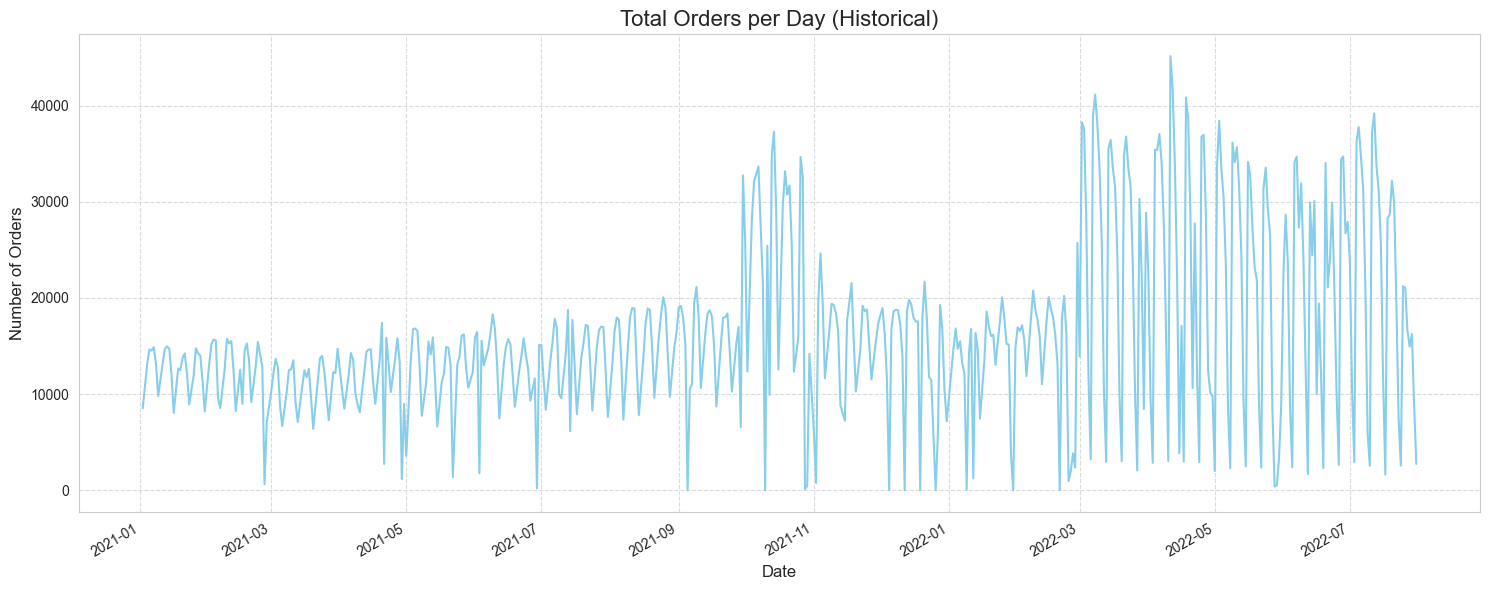

In [36]:
# Calculate the number of unique orders per day
orders_by_day = historical_orders.groupby('order_date').size()

plt.figure(figsize=(15, 6))
orders_by_day.plot(kind='line', color='skyblue')
plt.title("Total Orders per Day (Historical)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Analysis of Daily Order Volume:
- The number of orders varies significantly over time, with noticeable peaks and some days with very few or no orders.
- There appears to be an increasing trend in daily order volume from 2021 to 2022. Let's quantify this.

In [37]:
# Filter orders by year
orders_2021 = historical_orders[historical_orders['order_date'].dt.year == 2021]
orders_2022 = historical_orders[historical_orders['order_date'].dt.year == 2022]

# Group by day and count orders for each year
orders_by_day_2021 = orders_2021.groupby('order_date').size()
orders_by_day_2022 = orders_2022.groupby('order_date').size()

# Calculate descriptive statistics for daily orders
stats = {
    'Year': ['2021', '2022'],
    'Mean Daily Orders': [orders_by_day_2021.mean(), orders_by_day_2022.mean()],
    'Median Daily Orders': [orders_by_day_2021.median(), orders_by_day_2022.median()],
    'Std Dev Daily Orders': [orders_by_day_2021.std(), orders_by_day_2022.std()]
}

stats_df = pd.DataFrame(stats)
print("Daily Order Statistics by Year:")
display(stats_df)

Daily Order Statistics by Year:


,Year,Mean Daily Orders,Median Daily Orders,Std Dev Daily Orders
0,2021,14229.433544,14146.5,6133.776597
1,2022,19904.737864,18706.5,11916.963395


### Analysis of Daily Order Statistics:
- Comparing daily order statistics for 2021 and 2022, we observe that the **mean daily orders in 2022 are significantly higher than in 2021**, indicating an overall increase in order activity.
- The **median also shows an increase**, suggesting that most days in 2022 had more orders than in 2021.
- The **standard deviation is higher in 2022**, indicating greater fluctuation or variability in the number of daily orders compared to 2021. This could be due to more pronounced peaks or troughs.

### 4.2 Distribution of Unique Order Days per User

This analysis helps us understand how frequently different users place orders.

Calculate the number of unique order days for each user

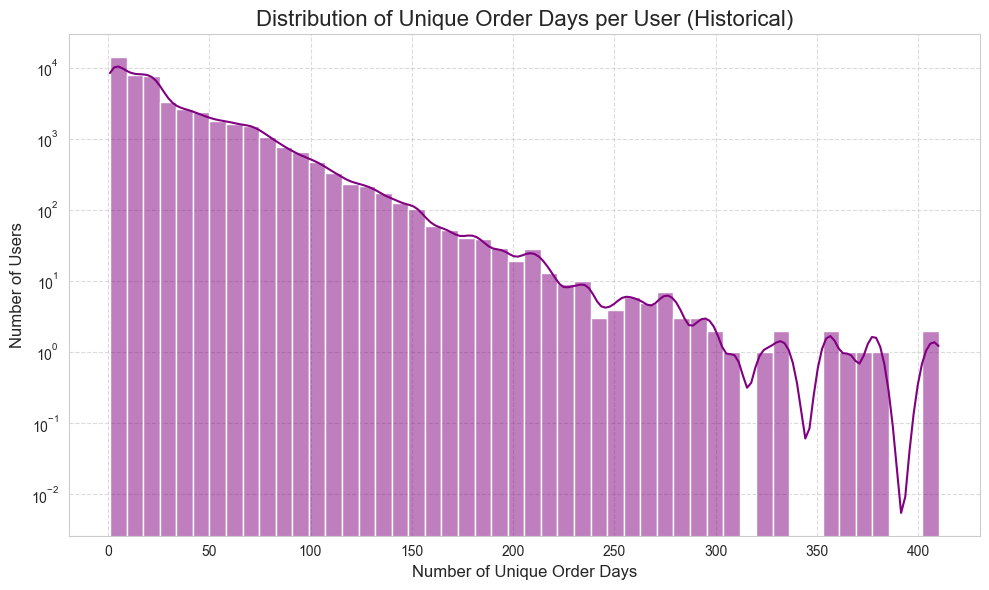

In [38]:
days_per_user = historical_orders.groupby('account_id')['order_date'].nunique()

plt.figure(figsize=(10, 6))
sns.histplot(days_per_user, bins=50, kde=True, color='purple')
plt.title("Distribution of Unique Order Days per User (Historical)", fontsize=16)
plt.xlabel("Number of Unique Order Days", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.yscale('log') # Use log scale for y-axis to better visualize the long tail
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Analysis of Unique Order Days per User:
- The distribution is highly skewed to the left, indicating that **a large majority of users place orders on only a few distinct days**.
- There's a significant peak at 1 unique order day, meaning many users have only ordered once or on a single day within the historical period.
- A long tail extends to the right, showing that a smaller number of users place orders on many different days, indicating more frequent purchasing behavior. This suggests a diverse customer base with varying engagement levels.

### 4.3 Distribution of Transaction Amount

Understanding the typical transaction values can provide insights into the nature of purchases.

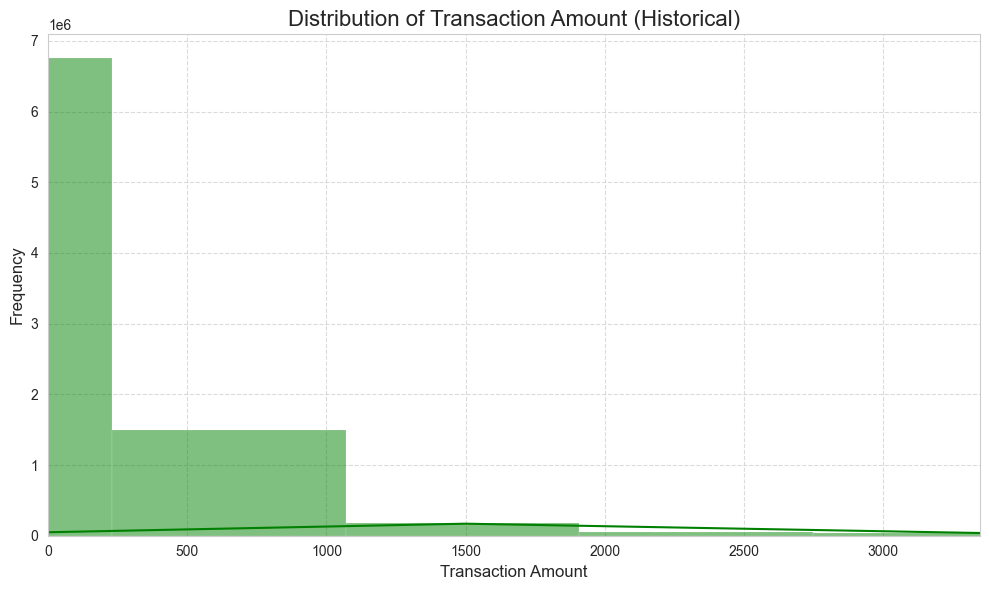


Descriptive Statistics for Transaction Amount:


count    8.596877e+06
mean     2.755161e+02
std      1.269133e+03
min     -6.075000e+02
25%      3.294000e+01
50%      8.070000e+01
75%      1.964400e+02
max      4.185789e+05
Name: transaction_amount, dtype: float64

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(historical_orders['transaction_amount'], bins=500, kde=True, color='green')
plt.title("Distribution of Transaction Amount (Historical)", fontsize=16)
plt.xlabel("Transaction Amount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim(0, historical_orders['transaction_amount'].quantile(0.99)) # Limit x-axis to 99th percentile for better visualization of the main bulk
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nDescriptive Statistics for Transaction Amount:")
display(historical_orders['transaction_amount'].describe())


### Analysis of Transaction Amount Distribution:
- The distribution is heavily skewed to the right, with **most transactions having relatively low values (between 0 and approximately 1000)**.
- There's a very long tail indicating the presence of a few very high-value transactions. This suggests that while most orders are for low-cost items, there are occasional high-value purchases.
- The mean (approx. 1000) is much higher than the median (approx. 100), confirming the strong positive skewness due to outliers.

## 5. Analysis of August Data

This section focuses on the `august_with_missing_order_days` and `august_total_sales` datasets, which are important for the prediction task.

### 5.1 Distribution of Known Order Days in August

We'll look at the distribution of unique order days for users in August based on the `august_with_missing_order_days` file.

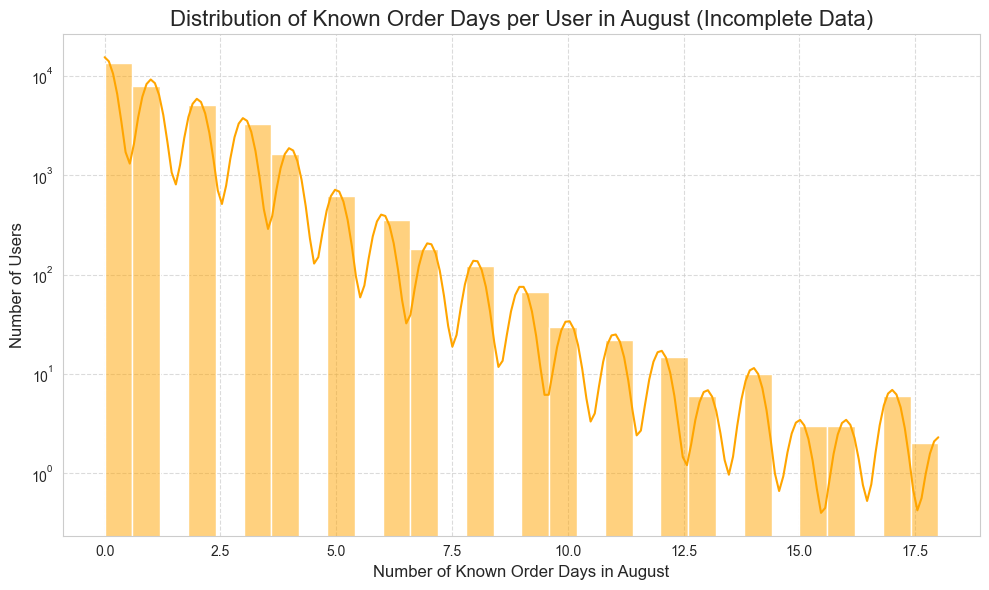

Descriptive Statistics for `total_transaction_amount_august`:


count    3.294400e+04
mean     6.413068e+03
std      3.953953e+04
min     -9.108000e+03
25%      5.700300e+02
50%      1.638605e+03
75%      4.558312e+03
max      2.638720e+06
Name: total_transaction_amount_august, dtype: float64

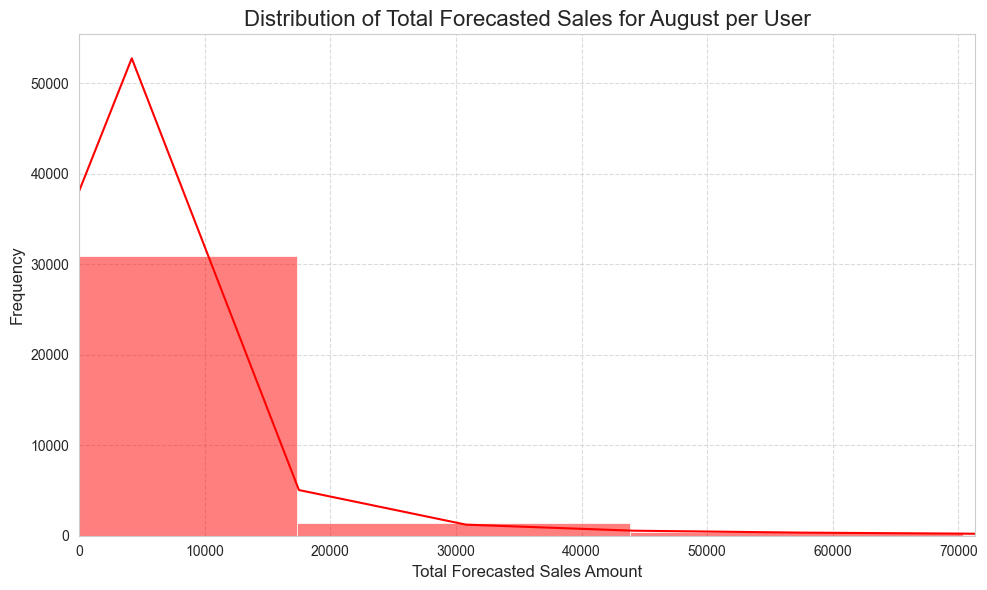

Number of unique accounts in historical_orders: 47899
Number of unique accounts in august_total_sales: 32944
Number of unique accounts in august_with_missing_order_days: 32944

Accounts in august_total_sales also in historical_orders: 31721
Accounts in august_with_missing_order_days also in historical_orders: 31721
Accounts in august_total_sales also in august_with_missing_order_days: 32944

All accounts in `august_total_sales` are present in `august_with_missing_order_days`.


In [ ]:
# Calculate the number of unique order days for each user in August (based on available data)
days_in_august = august_missing_days.groupby('account_id')['order_date'].nunique()

plt.figure(figsize=(10, 6))
sns.histplot(days_in_august, bins=30, color='orange', kde=True)
plt.title("Distribution of Known Order Days per User in August (Incomplete Data)", fontsize=16)
plt.xlabel("Number of Known Order Days in August", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.yscale('log') # Use log scale for y-axis
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Analysis of Known Order Days in August:
- Similar to the historical data, this histogram shows that **most users have a small number of known order days in August**.
- The distribution is also heavily skewed, with a large number of users having only 1 or 2 known order days.
- This pattern is consistent with the historical behavior, suggesting that sporadic ordering is common. The task is to predict the *remaining* days, so understanding this baseline is important.

### 5.2 Analysis of `august_total_sales`

This dataset provides the forecasted total transaction amount for August for each user.

In [ ]:
print("Descriptive Statistics for `total_transaction_amount_august`:")
display(august_total_sales['total_transaction_amount_august'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(august_total_sales['total_transaction_amount_august'], bins=100, kde=True, color='red')
plt.title("Distribution of Total Forecasted Sales for August per User", fontsize=16)
plt.xlabel("Total Forecasted Sales Amount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim(0, august_total_sales['total_transaction_amount_august'].quantile(0.99)) # Limit x-axis
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Analysis of Total Forecasted Sales for August:
- The distribution of forecasted total sales for August is also **highly skewed to the right**, similar to individual transaction amounts.
- Most users are forecasted to have relatively low total sales in August, while a few users have very high forecasted sales.
- This feature can be valuable for the prediction model, as users with higher forecasted sales might also have more order days.

### 5.3 Overlap of Account IDs

It's important to check the overlap of `account_id`s across the different datasets.

In [43]:
historical_accounts = set(historical_orders['account_id'].unique())
august_sales_accounts = set(august_total_sales['account_id'].unique())
august_missing_accounts = set(august_missing_days['account_id'].unique())

print(f"Number of unique accounts in historical_orders: {len(historical_accounts)}")
print(f"Number of unique accounts in august_total_sales: {len(august_sales_accounts)}")
print(f"Number of unique accounts in august_with_missing_order_days: {len(august_missing_accounts)}")

# Check overlap
print(f"\nAccounts in august_total_sales also in historical_orders: {len(august_sales_accounts.intersection(historical_accounts))}")
print(f"Accounts in august_with_missing_order_days also in historical_orders: {len(august_missing_accounts.intersection(historical_accounts))}")
print(f"Accounts in august_total_sales also in august_with_missing_order_days: {len(august_sales_accounts.intersection(august_missing_accounts))}")

# Check if all accounts in august_total_sales are present in august_with_missing_order_days (as required for prediction)
if august_sales_accounts.issubset(august_missing_accounts):
    print("\nAll accounts in `august_total_sales` are present in `august_with_missing_order_days`.")
else:
    print("\nWarning: Not all accounts in `august_total_sales` are present in `august_with_missing_order_days`. This might require careful handling for prediction.")

Number of unique accounts in historical_orders: 47899
Number of unique accounts in august_total_sales: 32944
Number of unique accounts in august_with_missing_order_days: 32944

Accounts in august_total_sales also in historical_orders: 31721
Accounts in august_with_missing_order_days also in historical_orders: 31721
Accounts in august_total_sales also in august_with_missing_order_days: 32944

All accounts in `august_total_sales` are present in `august_with_missing_order_days`.


The problem statement for Question 1 says: "Do it for all the users that appear in the file 'august_with_missing_order_days.parquet'".
This implies that the final prediction file should contain all `account_id`s from `august_with_missing_order_days`.
The `august_total_sales` file has 32944 rows, which matches the required output shape for the prediction CSV.
This suggests that `august_total_sales` contains the definitive list of accounts for which predictions are needed.
The `august_with_missing_order_days` file might contain a subset of these accounts, or it might contain all of them but with missing order data for some.
Given the shapes, it's likely that `august_total_sales` provides the definitive list of accounts for prediction.

## 6. Summary of EDA Findings and Next Steps

### Key Findings:
- **Data Coverage**: `historical_orders` spans from 2021-01-02 to 2022-07-31. `august_with_missing_order_days` covers August 2022.
- **Order Volume Trends**: Daily order volume increased from 2021 to 2022, with higher means and medians in 2022, but also greater variability.
- **User Ordering Behavior**: Most users place orders on only a few distinct days historically. A smaller segment of users orders very frequently. This pattern is also observed in the partial August data.
- **Transaction Amounts**: Both individual transaction amounts and forecasted total August sales are heavily skewed, with most values being low and a few very high.
- **Account Overlap**: The `august_total_sales` dataset appears to contain the complete list of `account_id`s for which predictions are required (32944 accounts), and these accounts largely overlap with historical data.

### Implications for Modeling:
- The skewed distributions of order days and transaction amounts suggest that models robust to outliers or transformations might be beneficial.
- The varying frequency of user orders implies that features capturing historical ordering behavior (e.g., average order days per month, standard deviation of order days) will be important.
- The `total_transaction_amount_august` can serve as a strong predictive feature, as higher forecasted sales might correlate with more order days.
- The "remaining orders left for the month" target requires careful definition, especially when simulating training data, as discussed in the previous interaction.


In [44]:
# # Order Days Prediction - BEES Data Science Challenge
# """
# This script implements a machine learning model to predict the number of remaining
# order days for users in August 2022, as part of the BEES Data Science Challenge.

# It covers data loading, preprocessing, feature engineering, model training
# (using LightGBM), evaluation, and generating the final predictions.
# """

# # Imports
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from lightgbm import LGBMRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error

# # Load data
# # Loading the three necessary parquet files into pandas DataFrames.
# historical_orders = pd.read_parquet("historical_orders.parquet")
# august_total_sales = pd.read_parquet("august_total_sales.parquet")
# august_missing_days = pd.read_parquet("august_with_missing_order_days.parquet")

# # Preprocessing
# def preprocess():
#     """
#     Performs initial data preprocessing steps.

#     This includes converting 'order_date' columns in historical_orders and
#     august_missing_days DataFrames to datetime objects for easier manipulation.

#     Returns:
#         tuple: A tuple containing the preprocessed historical_orders,
#                august_total_sales, and august_missing_days DataFrames.
#     """
#     # Convert 'order_date' columns to datetime objects
#     historical_orders['order_date'] = pd.to_datetime(historical_orders['order_date'])
#     august_missing_days['order_date'] = pd.to_datetime(august_missing_days['order_date'])
#     return historical_orders, august_total_sales, august_missing_days

# # Execute preprocessing
# historical_orders, august_total_sales, august_missing_days = preprocess()

# # --- Feature Engineering ---
# def build_historical_features(historical_df: pd.DataFrame) -> pd.DataFrame:
#     """
#     Builds historical features for each account based on past order data.

#     Features include the mean and standard deviation of unique order days per month
#     for each account.

#     Args:
#         historical_df (pd.DataFrame): DataFrame containing historical order data
#                                       with 'account_id' and 'order_date'.

#     Returns:
#         pd.DataFrame: A DataFrame with 'account_id', 'historical_avg_order_days',
#                       and 'historical_std_order_days'.
#     """
#     # Extract year and month from order date to group by month
#     historical_df['year_month'] = historical_df['order_date'].dt.to_period('M')
    
#     # Group by account and month, then count unique order days for each month
#     agg = historical_df.groupby(['account_id', 'year_month'])['order_date'].nunique().reset_index()
    
#     # Calculate mean and standard deviation of unique order days across all months for each account
#     stats = agg.groupby('account_id')['order_date'].agg(['mean', 'std']).reset_index()
    
#     # Rename columns for clarity
#     stats.columns = ['account_id', 'historical_avg_order_days', 'historical_std_order_days']
#     return stats

# # Generate historical features
# hist_features = build_historical_features(historical_orders)

# # --- Simulate Supervised Training Data ---
# def simulate_training_data(historical_df: pd.DataFrame) -> pd.DataFrame:
#     """
#     Simulates a supervised training dataset based on historical orders.

#     For each account and month, it generates data points for each day of the month,
#     calculating the number of orders already placed ('orders_so_far') and the
#     number of remaining order days ('target_days_left') from that day's perspective.

#     Args:
#         historical_df (pd.DataFrame): DataFrame containing historical order data
#                                       with 'account_id' and 'order_date'.

#     Returns:
#         pd.DataFrame: A DataFrame suitable for training, with columns like
#                       'account_id', 'day_of_month', 'orders_so_far',
#                       and 'target_days_left'.
#     """
#     training_data = []
#     # Group historical data by account and month
#     for (account, month), df_month in historical_df.groupby(["account_id", historical_df['order_date'].dt.to_period('M')]):
#         # Get unique order days within the current month, sorted
#         order_days = sorted(df_month['order_date'].dt.day.unique())
        
#         # Iterate through each day of the month (1 to 31)
#         for day in range(1, 32):
#             # Only consider days up to the last actual order day in that month
#             # This ensures we don't generate data points for future days without orders
#             if day <= max(order_days, default=0):
#                 # Calculate remaining order days: count unique order days strictly AFTER the current 'day'
#                 # This aligns with the problem statement: "prediction is the remaining orders left for the month"
#                 # and the example "before the 20th to be 2" (if orders are on 20th and 30th)
#                 remaining = sum([1 for d in order_days if d > day])
                
#                 # Calculate orders placed so far: count unique order days strictly BEFORE the current 'day'
#                 orders_so_far = sum([1 for d in order_days if d < day])
                
#                 training_data.append({
#                     'account_id': account,
#                     'year_month': month, # Keep year_month for merging with monthly_sales if needed
#                     'day_of_month': day,
#                     'orders_so_far': orders_so_far,
#                     'target_days_left': remaining
#                 })
#     return pd.DataFrame(training_data)

# # Generate the supervised training data
# supervised_df = simulate_training_data(historical_orders)

# # Merge with historical features
# # This adds the calculated historical average and standard deviation of order days to the training data.
# supervised_df = supervised_df.merge(hist_features, on='account_id', how='left')

# # --- Model Training ---
# # Define the features to be used for training the model
# feature_cols = ['day_of_month', 'orders_so_far', 'historical_avg_order_days', 'historical_std_order_days']

# # Prepare feature matrix (X) and target vector (y)
# # Fill any NaN values (e.g., for new accounts without historical data) with 0
# X = supervised_df[feature_cols].fillna(0)
# y = supervised_df['target_days_left']

# # Split data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train the LightGBM Regressor model
# model = LGBMRegressor(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42)
# model.fit(X_train, y_train)

# # Validation
# # Make predictions on the validation set
# y_pred = model.predict(X_val)
# # Calculate and print Mean Absolute Error (MAE) to evaluate model performance
# print("MAE on validation set:", mean_absolute_error(y_val, y_pred))

# # --- Real Prediction for August ---
# # Extract the day of the month from the 'order_date' in the August missing days data
# august_missing_days['day_of_month'] = august_missing_days['order_date'].dt.day

# # Calculate 'orders_so_far' for each account in August based on the provided partial data
# # This represents the number of unique order days already observed for each account in August.
# orders_so_far = august_missing_days.groupby('account_id')['order_date'].nunique().reset_index()
# orders_so_far.columns = ['account_id', 'orders_so_far']

# # Prepare the data for August prediction
# # Start with the august_total_sales DataFrame as it contains all accounts for prediction
# august_data = august_total_sales.copy()

# # Merge historical features (avg and std order days)
# august_data = august_data.merge(hist_features, on='account_id', how='left')

# # Merge the 'orders_so_far' calculated from august_missing_days
# august_data = august_data.merge(orders_so_far, on='account_id', how='left')

# # Fill any NaN values in 'orders_so_far' with 0 (for accounts with no observed orders in August yet)
# august_data['orders_so_far'] = august_data['orders_so_far'].fillna(0)

# # Determine the 'day_of_month' for prediction for each account in August
# # Use the last observed order day for each user as the current 'day_of_month' for prediction.
# last_order_day = august_missing_days.groupby('account_id')['day_of_month'].max().reset_index()
# last_order_day.columns = ['account_id', 'day_of_month']
# august_data = august_data.merge(last_order_day, on='account_id', how='left')

# # For accounts with no observed orders in August, assume the prediction is made on the 1st day of the month.
# august_data['day_of_month'] = august_data['day_of_month'].fillna(1)

# # The problem statement mentions 'august_total_sales.parquet' contains forecasted total transaction amount.
# # While this feature was not explicitly used in the provided `feature_cols`,
# # if it were to be used, its column name would need to be aligned or handled.
# # For now, it's not part of `feature_cols`.

# # Prepare the feature matrix for August prediction
# # Fill any remaining NaN values (e.g., for accounts without historical features) with 0
# X_august = august_data[feature_cols].fillna(0)

# # Make predictions for August
# august_data['prediction'] = model.predict(X_august)

# # --- Save Final Prediction ---
# # Select only the required columns for the submission file
# prediction_file = august_data[['account_id', 'prediction']].copy()

# # Clip predictions to ensure they are non-negative and round to the nearest integer
# # as the number of order days must be a whole number.
# prediction_file['prediction'] = prediction_file['prediction'].clip(lower=0).round().astype(int)

# # Save the predictions to a CSV file as required by the challenge
# prediction_file.to_csv("order_days_prediction.csv", index=False)
# print("Prediction file saved: order_days_prediction.csv")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 7628338, number of used features: 4
[LightGBM] [Info] Start training from score 2.137178
MAE on validation set: 0.6812306176160744
Prediction file saved: order_days_prediction.csv


In [42]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# --- Load Data ---
historical_orders = pd.read_parquet("historical_orders.parquet")
august_total_sales = pd.read_parquet("august_total_sales.parquet")
august_missing_days = pd.read_parquet("august_with_missing_order_days.parquet")

# --- Preprocessing ---
def preprocess():
    historical_orders['order_date'] = pd.to_datetime(historical_orders['order_date'])
    august_missing_days['order_date'] = pd.to_datetime(august_missing_days['order_date'])
    return historical_orders, august_total_sales, august_missing_days

historical_orders, august_total_sales, august_missing_days = preprocess()

# --- Feature: Histórico de média e desvio de dias de pedido ---
def build_historical_features(historical_df):
    historical_df['year_month'] = historical_df['order_date'].dt.to_period('M')
    agg = historical_df.groupby(['account_id', 'year_month'])['order_date'].nunique().reset_index()
    stats = agg.groupby('account_id')['order_date'].agg(['mean', 'std']).reset_index()
    stats.columns = ['account_id', 'historical_avg_order_days', 'historical_std_order_days']
    return stats

# --- Feature: Valor total transacionado por mês histórico ---
def build_monthly_sales(historical_df):
    historical_df['year_month'] = historical_df['order_date'].dt.to_period('M')
    monthly_sales = historical_df.groupby(['account_id', 'year_month'])['transaction_amount'].sum().reset_index()
    monthly_sales.columns = ['account_id', 'year_month', 'historical_total_transaction_amount']
    return monthly_sales

# --- Simular dataset supervisionado ---
def simulate_training_data(historical_df):
    training_data = []
    for (account, month), df_month in historical_df.groupby(["account_id", historical_df['order_date'].dt.to_period('M')]):
        order_days = sorted(df_month['order_date'].dt.day.unique())
        for day in range(1, 32):
            if day <= max(order_days, default=0):
                remaining = sum([1 for d in order_days if d > day])
                training_data.append({
                    'account_id': account,
                    'year_month': month,
                    'day_of_month': day,
                    'orders_so_far': sum([1 for d in order_days if d < day]),
                    'target_days_left': remaining
                })
    return pd.DataFrame(training_data)

# --- Gerar dados de treino ---
hist_features = build_historical_features(historical_orders)
monthly_sales = build_monthly_sales(historical_orders)
supervised_df = simulate_training_data(historical_orders)

# Merge com features
supervised_df = supervised_df.merge(hist_features, on='account_id', how='left')
supervised_df = supervised_df.merge(monthly_sales, on=['account_id', 'year_month'], how='left')

# --- Model Training ---
feature_cols = ['day_of_month', 'orders_so_far', 'historical_avg_order_days',
                'historical_std_order_days', 'historical_total_transaction_amount']

X = supervised_df[feature_cols].fillna(0)
y = supervised_df['target_days_left']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = LGBMRegressor(n_estimators=100, learning_rate=0.05, max_depth=6)
model.fit(X_train, y_train)

# --- Avaliação do modelo ---
y_pred = model.predict(X_val)
print("MAE:", mean_absolute_error(y_val, y_pred))

# --- Predição final para agosto ---
august_missing_days['day_of_month'] = august_missing_days['order_date'].dt.day
orders_so_far = august_missing_days.groupby('account_id')['order_date'].nunique().reset_index()
orders_so_far.columns = ['account_id', 'orders_so_far']

# Preparar dados para predição
august_data = august_total_sales.copy()
august_data = august_data.merge(hist_features, on='account_id', how='left')
august_data = august_data.merge(orders_so_far, on='account_id', how='left')
august_data['orders_so_far'] = august_data['orders_so_far'].fillna(0)

# Usar último dia observado por usuário como referência
last_order_day = august_missing_days.groupby('account_id')['day_of_month'].max().reset_index()
last_order_day.columns = ['account_id', 'day_of_month']
august_data = august_data.merge(last_order_day, on='account_id', how='left')
august_data['day_of_month'] = august_data['day_of_month'].fillna(1)

# Renomear coluna de forecast para manter compatibilidade com treino
august_data.rename(columns={'total_transaction_amount_august': 'historical_total_transaction_amount'}, inplace=True)

# Predição
X_august = august_data[feature_cols].fillna(0)
august_data['prediction'] = model.predict(X_august)

# --- Salvar arquivo final ---
prediction_file = august_data[['account_id', 'prediction']].copy()
prediction_file['prediction'] = prediction_file['prediction'].clip(lower=0).round().astype(int)
prediction_file.to_csv("order_days_prediction.csv", index=False)
print("Arquivo salvo: order_days_prediction.csv")


KeyboardInterrupt: 